<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/ModelsTestandComprision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Step 1: The dataset
file_path = '/content/Final_dataset.xlsx'
df = pd.read_excel(file_path)

features = df.iloc[:, 1:-1]
labels = df.iloc[:, -1]


Training Logistic Regression...
Logistic Regression Accuracy: 0.8426698450536353
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2581
           1       0.83      0.85      0.84      2453

    accuracy                           0.84      5034
   macro avg       0.84      0.84      0.84      5034
weighted avg       0.84      0.84      0.84      5034



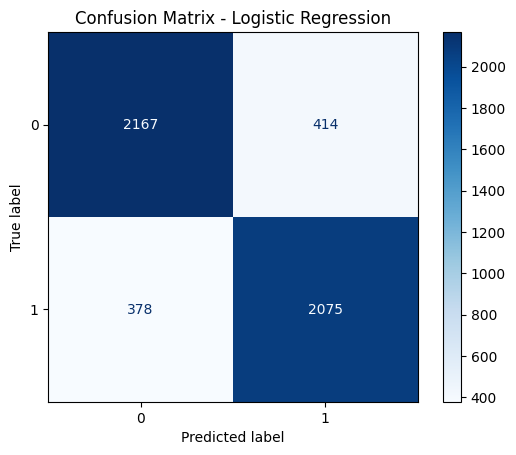

Training Random Forest...
Random Forest Accuracy: 0.9821215733015495
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2581
           1       0.99      0.97      0.98      2453

    accuracy                           0.98      5034
   macro avg       0.98      0.98      0.98      5034
weighted avg       0.98      0.98      0.98      5034



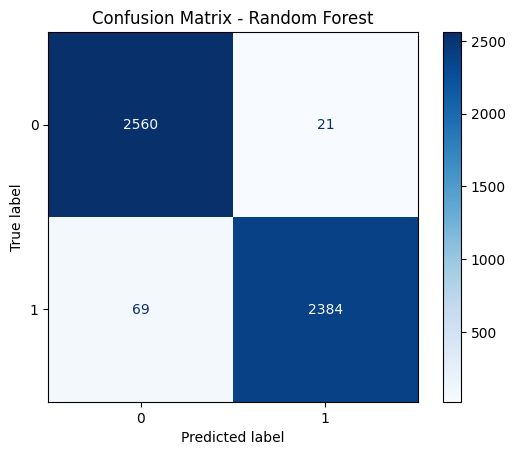

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9179578863726658
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2581
           1       0.91      0.92      0.92      2453

    accuracy                           0.92      5034
   macro avg       0.92      0.92      0.92      5034
weighted avg       0.92      0.92      0.92      5034



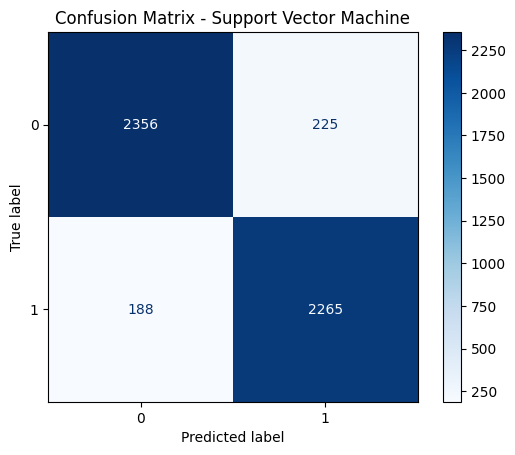

Training Decision Tree...
Decision Tree Accuracy: 0.9725864123957092
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2581
           1       0.98      0.97      0.97      2453

    accuracy                           0.97      5034
   macro avg       0.97      0.97      0.97      5034
weighted avg       0.97      0.97      0.97      5034



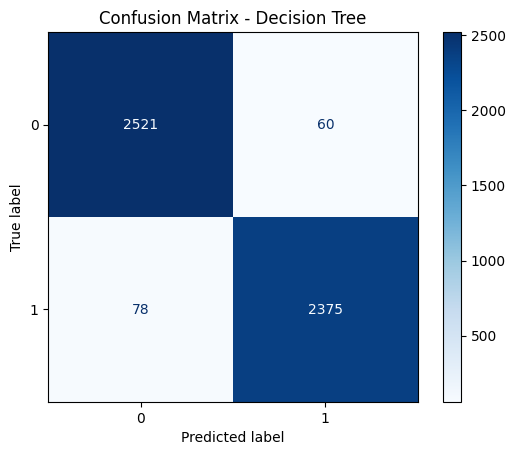

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9948351211760031
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2581
           1       1.00      0.99      0.99      2453

    accuracy                           0.99      5034
   macro avg       0.99      0.99      0.99      5034
weighted avg       0.99      0.99      0.99      5034



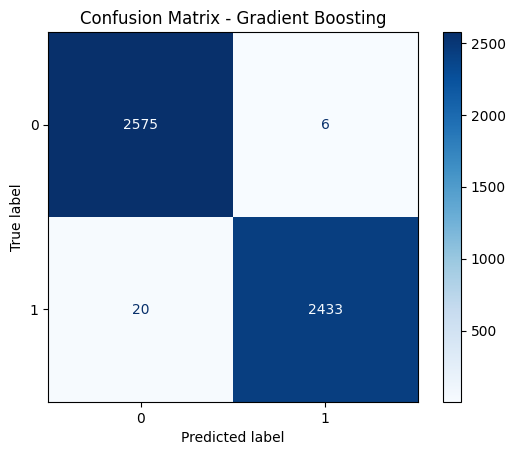

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9964243146603099
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2581
           1       1.00      0.99      1.00      2453

    accuracy                           1.00      5034
   macro avg       1.00      1.00      1.00      5034
weighted avg       1.00      1.00      1.00      5034



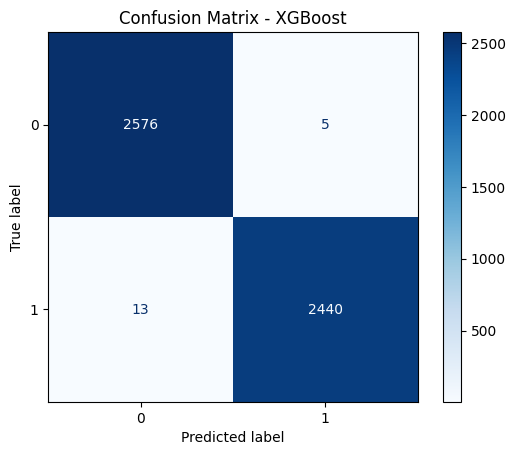


Model Comparison:
Logistic Regression - Accuracy: 0.8426698450536353
Random Forest - Accuracy: 0.9821215733015495
Support Vector Machine - Accuracy: 0.9179578863726658
Decision Tree - Accuracy: 0.9725864123957092
Gradient Boosting - Accuracy: 0.9948351211760031
XGBoost - Accuracy: 0.9964243146603099


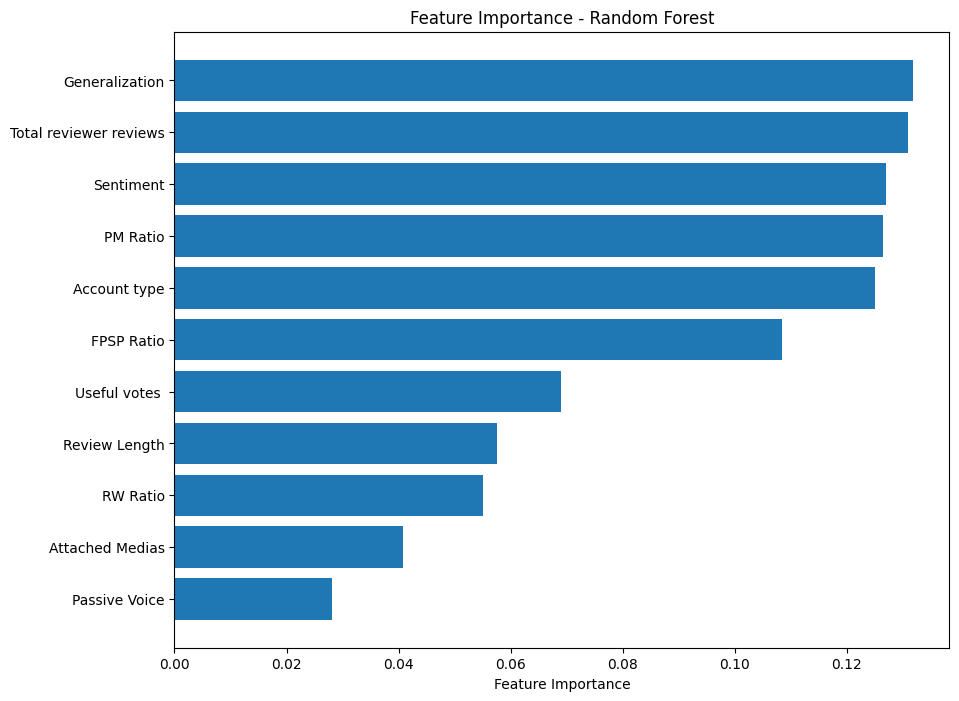

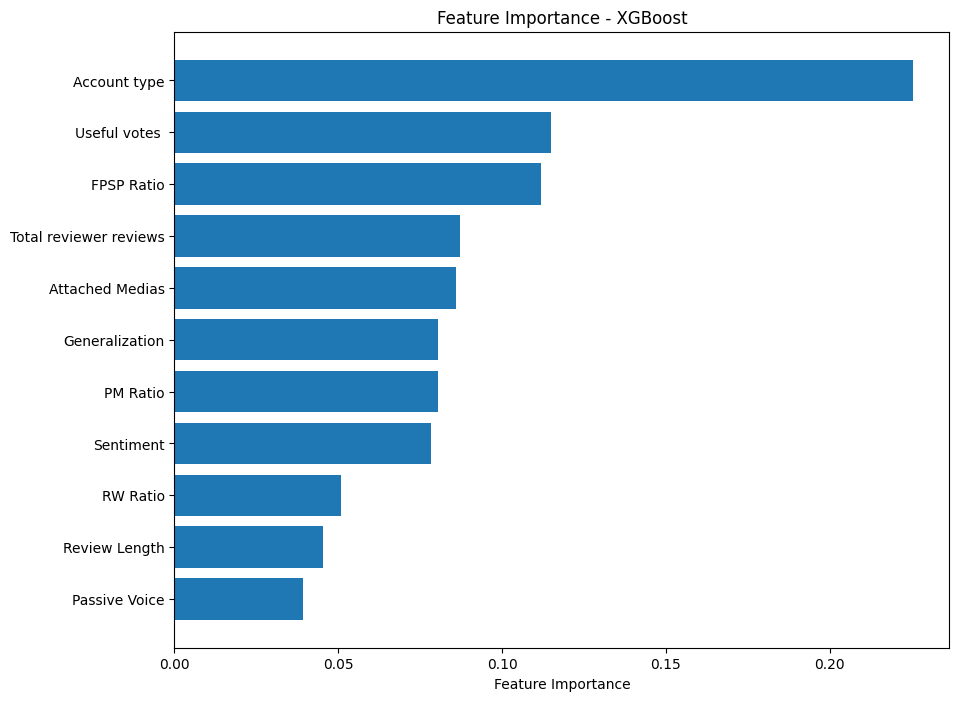

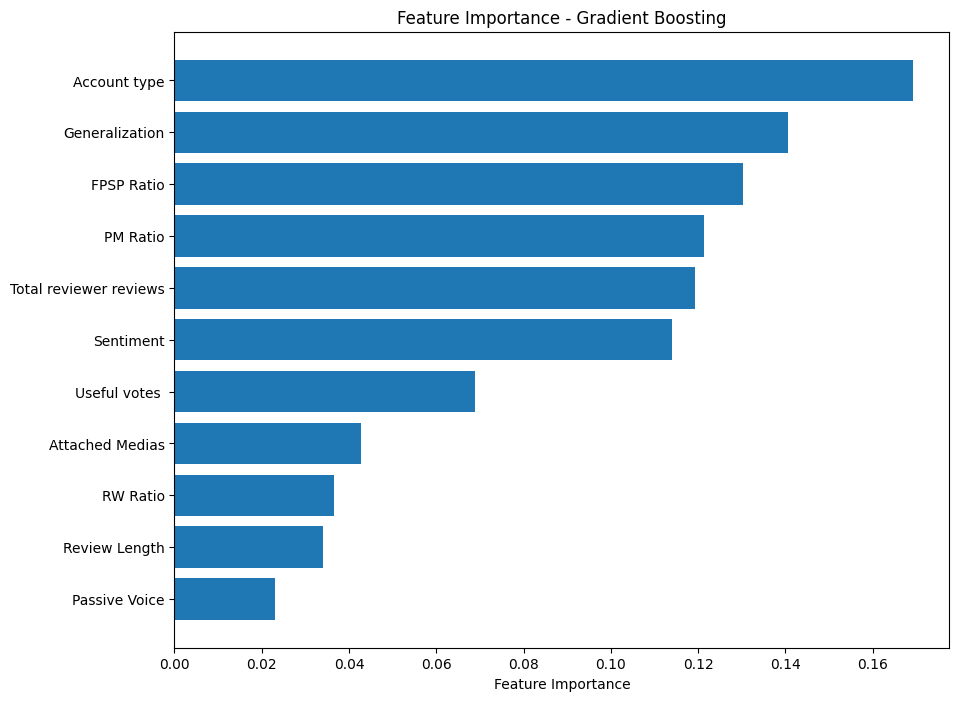

In [ ]:
# Step 3: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_scaled, labels)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Step 7: Train the models and evaluate their performance
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Classification Report for {model_name}:\n{report}")

    # Store results
    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    # Plot confusion matrix
    cm = results[model_name]["confusion_matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Step 8: Compare model performance
print("\nModel Comparison:")
for model_name, result in results.items():
    print(f"{model_name} - Accuracy: {result['accuracy']}")

# Step 9: Feature Importance (Effect on Model Performance)

# Note: Not all models provide feature importances. We'll focus on models that do.
for model_name in ["Random Forest", "XGBoost", "Gradient Boosting"]:
    if model_name in results:
        model = results[model_name]["model"]
        if hasattr(model, "feature_importances_"):
            feature_importances = model.feature_importances_
            feature_names = features.columns

            # Sort features by importance
            sorted_idx = feature_importances.argsort()
            plt.figure(figsize=(10, 8))
            plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align='center')
            plt.xlabel("Feature Importance")
            plt.title(f"Feature Importance - {model_name}")
            plt.show()


In [ ]:
print (df.head)


<bound method NDFrame.head of                                              review_text  PM Ratio  \
0      a bad experience I will never go to that place...  0.007968   
1      a bad experience in this place I will not retu...  0.030928   
2      A bastion of the old school diner Cheap sandwi...  0.051282   
3      A beautiful cafe in Brooklyn with many options...  0.016393   
4      A beautiful place to spend your time at The ca...  0.030769   
...                                                  ...       ...   
21471  Zero stars if I could Reporting this location ...  0.023529   
21472  Zero stars Rating is not for the food because ...  0.024609   
21473  Zero to minimal wait line if you go at off pea...  0.000000   
21474  Zoya working register is the slowest human bei...  0.010638   
21475  Zuo Zongtang chicken and broccoli beef are my ...  0.022901   

       FPSP Ratio  Review Length  RW Ratio  Sentiment  Generalization  \
0        0.045455             46  0.200000    -0.9607   

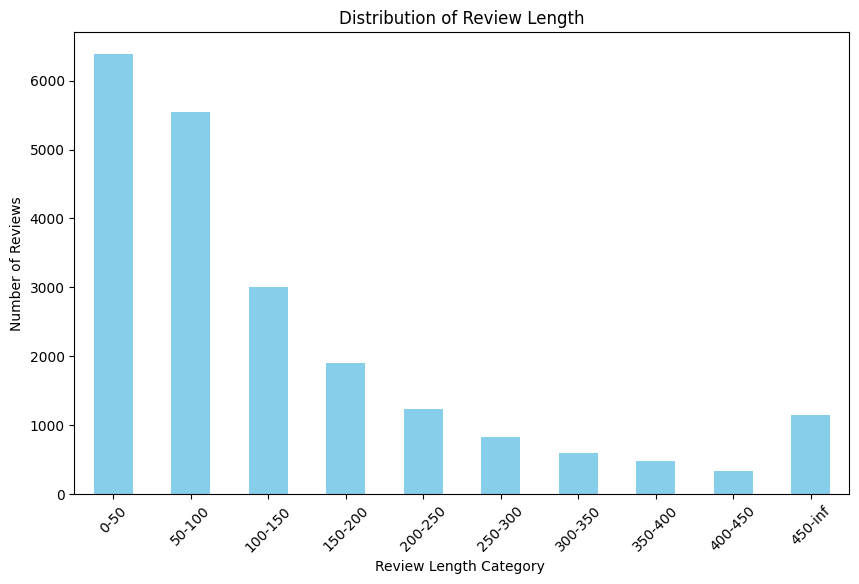

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Final_dataset.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Step 1: Calculate the length of each review
df['Review Length'] = df.iloc[:, 0].apply(len)  # Assuming the first column contains the reviews

# Step 2: Define the bins for categorizing review lengths into 10 categories
# You can define the bins based on the distribution of review lengths in your data
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, float('inf')]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# Step 3: Create a new column for the length category
df['length_category'] = pd.cut(df['Review Length'], bins=bins, labels=labels, include_lowest=True)

# Step 4: Draw a bar chart of the review length categories
length_category_counts = df['length_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
length_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length Category ')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


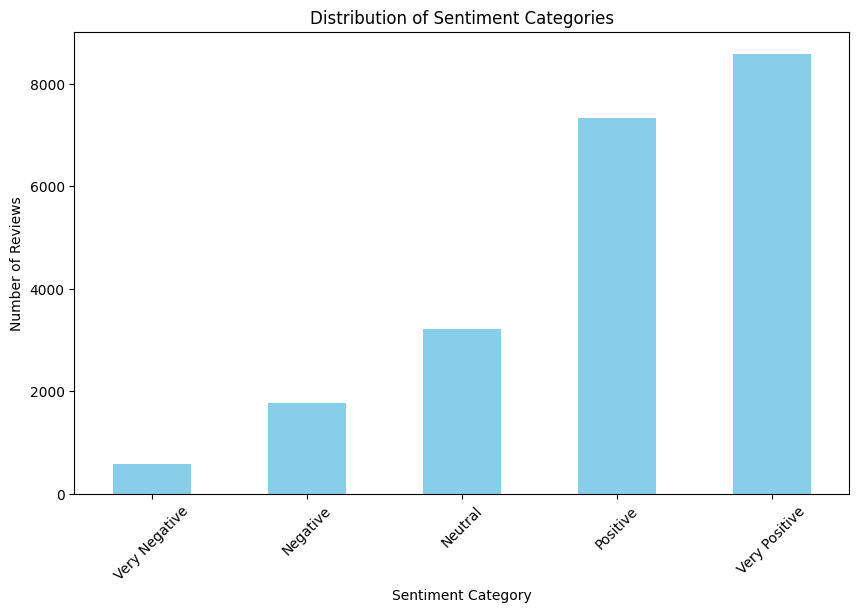

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Final_dataset.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Assuming the sentiment scores are in a column named 'sentiment'
# Step 1: Define the bins for categorizing sentiment into 5 categories
# The sentiment scores are typically between -1 and 1, so we'll use this range for the bins
bins = [-1, -0.5, 0, 0.5, 1]  # Define 5 bins, which creates 4 intervals
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']  # 5 labels

# Adjust the number of bins to match the number of categories
bins = [-1, -0.75, -0.25, 0.25, 0.75, 1]  # Now, we have 6 bin edges, creating 5 intervals

# Step 2: Create a new column for the sentiment category
df['sentiment_category'] = pd.cut(df['Sentiment'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Draw a bar chart of the sentiment categories
sentiment_category_counts = df['sentiment_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sentiment_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()



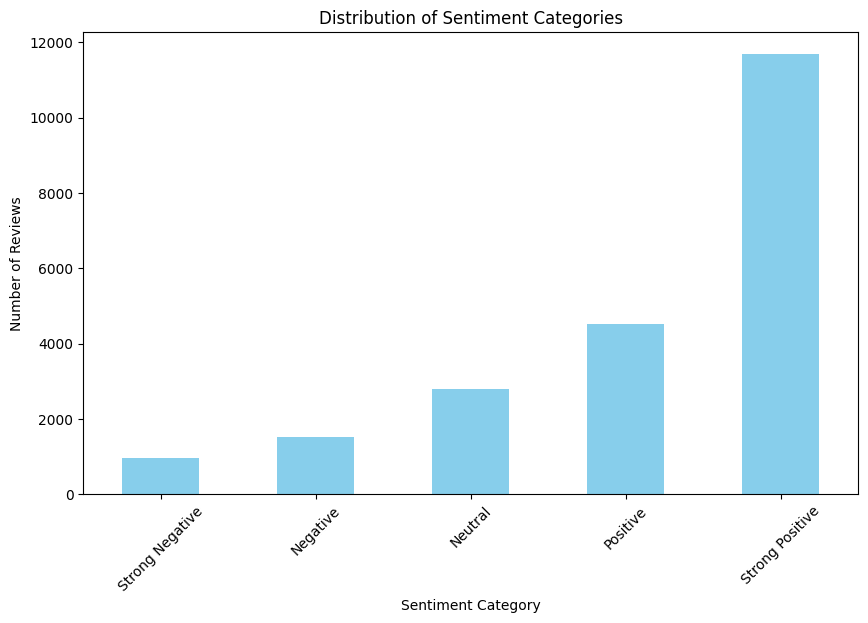

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming the sentiment scores are in a column named 'sentiment'
# Define the bins according to the specified categories
bins = [-1.0, -0.6, -0.2, 0.2, 0.6, 1.0]
labels = ['Strong Negative', 'Negative', 'Neutral', 'Positive', 'Strong Positive']

# Create a new column for the sentiment category
df['sentiment_category'] = pd.cut(df['Sentiment'], bins=bins, labels=labels, include_lowest=True)

# Draw a bar chart of the sentiment categories
sentiment_category_counts = df['sentiment_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sentiment_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the values in column G need to be categorized
# Define the bins for categorizing the values into 10 categories
# Adjust these bins according to the actual distribution of values in column G
# For example, if values range widely, you might use bins like this:
bins = [df['Generalization'].min(), df['Generalization'].quantile(0.1), df['Generalization'].quantile(0.2), df['Generalization'].quantile(0.3), df['Generalization'].quantile(0.4),
        df['Generalization'].quantile(0.5), df['Generalization'].quantile(0.6), df['Generalization'].quantile(0.7), df['Generalization'].quantile(0.8), df['Generalization'].quantile(0.9), df['Generalization'].max()]
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


if 'Generalization' in df.columns:
    # Manually define the bins based on your data's distribution
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust these ranges based on your data
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

    df['G_category'] = pd.cut(df['Generalization'], bins=bins, labels=labels, include_lowest=True)

    # Draw a bar chart of the categorized values in column G
    g_category_counts = df['G_category'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    g_category_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of G Categories')
    plt.xlabel('G Category')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'G' not found in the DataFrame.")



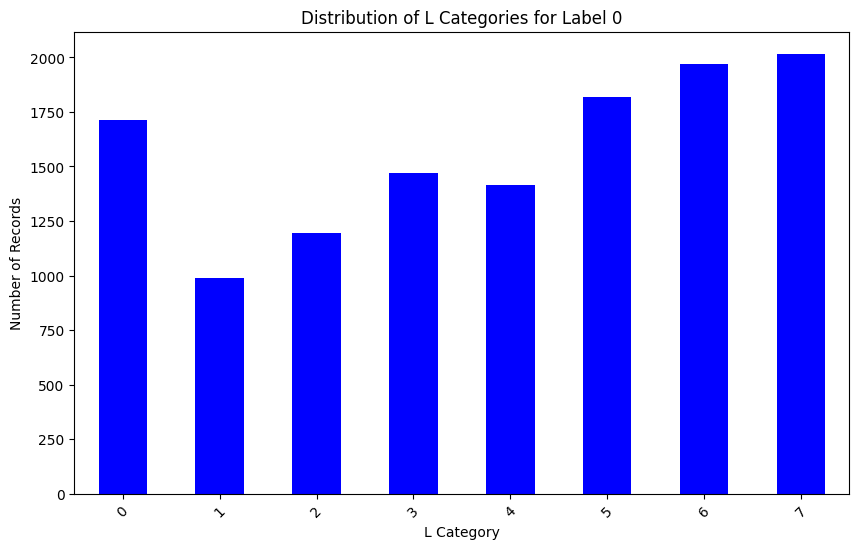

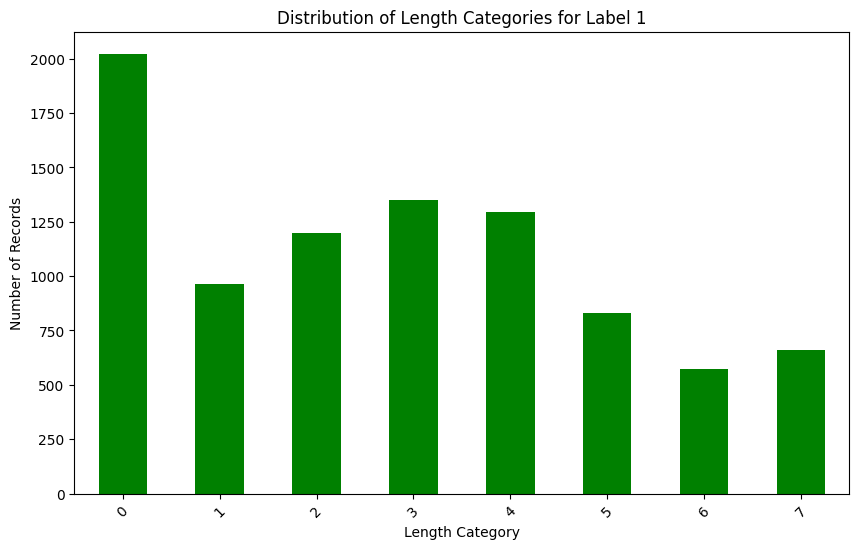

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)

# Define the bins for categorizing column L into 8 categories
bins = pd.qcut(df['Review Length'], 8, labels=False)  # Use qcut to split into quantiles
labels = ['3-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800']


# Create a new column for the category
df['L_category'] = bins

# Plot for label = 0
df_label_0 = df[df['Label'] == 0]
plt.figure(figsize=(10, 6))
df_label_0['L_category'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of L Categories for Label 0')
plt.xlabel('L Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

# Plot for label = 1
df_label_1 = df[df['Label'] == 1]
plt.figure(figsize=(10, 6))
df_label_1['L_category'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Length Categories for Label 1')
plt.xlabel('Length Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                        TF-IDF Accuracy  TF-IDF F1-Score  TF-IDF Precision  \
Logistic Regression            0.866853         0.840134          0.849153   
Random Forest                  0.918529         0.895335          0.974609   
Support Vector Machine         0.922486         0.906118          0.924094   

                        TF-IDF Recall  TF-IDF AUC-ROC  BoW Accuracy  \
Logistic Regression          0.831305        0.937879      0.853818   
Random Forest                0.827987        0.981897      0.917598   
Support Vector Machine       0.888827        0.979976      0.891294   

                        BoW F1-Score  BoW Precision  BoW Recall  BoW AUC-ROC  \
Logistic Regression         0.824385       0.833710    0.815265     0.925453   
Random Forest               0.893051       0.984021    0.817478     0.982564   
Support Vector Machine      0.865457       0.903187    0.830752     0.962221   

                        Bigram Accuracy  Bigram F1-Score  Bigram Precision  \
Log

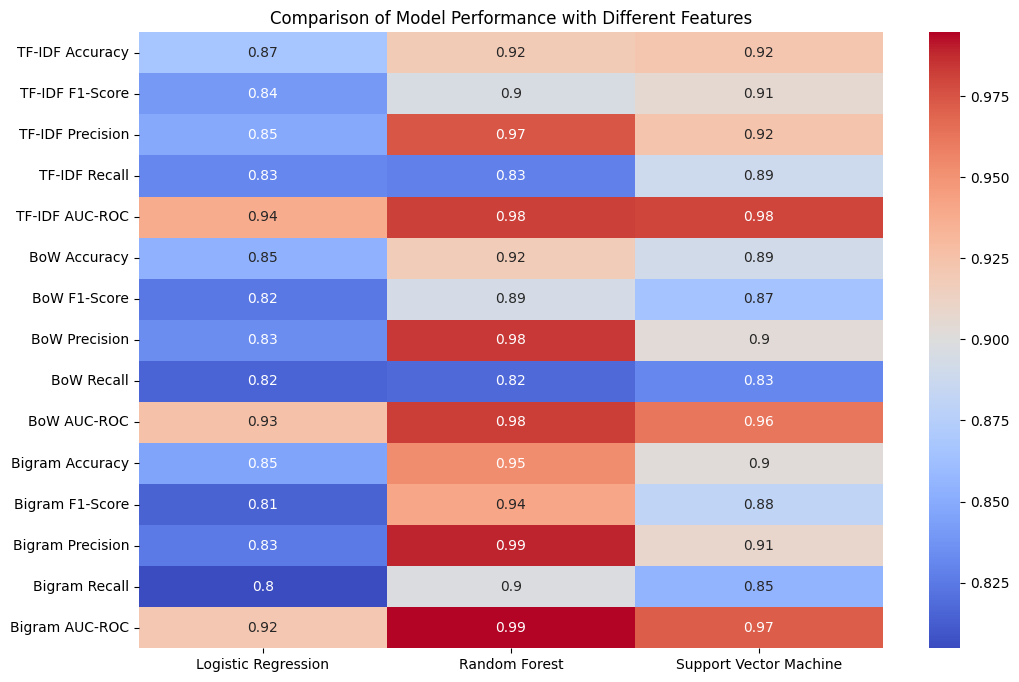

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'Final_dataset.xlsx'
df = pd.read_excel(file_path)

# Separate the text, features, and label
X_text = df.iloc[:, 0]  # First column for text
X_features = df.iloc[:, 1:-1]  # 11 numerical features
y = df.iloc[:, -1]  # Last column for label

# Scale the numerical features
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

# Define the vectorizers with reduced max_features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
bow_vectorizer = CountVectorizer(max_features=1000)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000)

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_bow = bow_vectorizer.fit_transform(X_text)
X_bigram = bigram_vectorizer.fit_transform(X_text)

# Convert all DataFrame column names to strings
X_features_scaled_df = pd.DataFrame(X_features_scaled)
X_features_scaled_df.columns = X_features_scaled_df.columns.astype(str)

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = X_tfidf_df.columns.astype(str)

X_bow_df = pd.DataFrame(X_bow.toarray())
X_bow_df.columns = X_bow_df.columns.astype(str)

X_bigram_df = pd.DataFrame(X_bigram.toarray())
X_bigram_df.columns = X_bigram_df.columns.astype(str)

# Combine the text features with scaled numerical features
X_tfidf_combined = pd.concat([X_tfidf_df, X_features_scaled_df], axis=1)
X_bow_combined = pd.concat([X_bow_df, X_features_scaled_df], axis=1)
X_bigram_combined = pd.concat([X_bigram_df, X_features_scaled_df], axis=1)

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_combined, y, test_size=0.2, random_state=42)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow_combined, y, test_size=0.2, random_state=42)
X_train_bigram, X_test_bigram, y_train, y_test = train_test_split(X_bigram_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='saga', n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
    'Support Vector Machine': SVC(probability=True)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

        results[name] = {
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall,
            'AUC-ROC': auc_roc
        }
    return pd.DataFrame(results).T

# Re-run the model evaluation
results_tfidf = train_and_evaluate(models, X_train_tfidf, X_test_tfidf, y_train, y_test)
results_bow = train_and_evaluate(models, X_train_bow, X_test_bow, y_train, y_test)
results_bigram = train_and_evaluate(models, X_train_bigram, X_test_bigram, y_train, y_test)

# Combine all results into a single DataFrame for comparison
comparison_df = pd.concat([results_tfidf.add_prefix('TF-IDF '),
                           results_bow.add_prefix('BoW '),
                           results_bigram.add_prefix('Bigram ')], axis=1)

print(comparison_df)

# Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df.T, annot=True, cmap='coolwarm')
plt.title('Comparison of Model Performance with Different Features')
plt.show()
